# Log 0.2
1. Reduced epochs to 15 and image size to 64x64
2. Little overtraining, ended at around accuracy a(t) ~ 0.45, a(v) ~ 0.38 and loss l(t) ~ 1.45, l(v) ~ 1.45

In [1]:
# print out data splits for all categories
import keras, os, shutil
#keras.__version__ 2.4.3


base = "data"
splits = ["training", "validating", "testing"]
categories = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]


for split in splits:
    for category in categories:
        path = os.path.join(base, split, category)
        print (path, "number of items:", len(os.listdir(path)))

data/training/cardboard number of items: 199
data/training/glass number of items: 199
data/training/metal number of items: 199
data/training/paper number of items: 199
data/training/plastic number of items: 299
data/training/trash number of items: 69
data/validating/cardboard number of items: 104
data/validating/glass number of items: 202
data/validating/metal number of items: 111
data/validating/paper number of items: 295
data/validating/plastic number of items: 183
data/validating/trash number of items: 38
data/testing/cardboard number of items: 100
data/testing/glass number of items: 100
data/testing/metal number of items: 100
data/testing/paper number of items: 100
data/testing/plastic number of items: 100
data/testing/trash number of items: 30


In [2]:
# load data and print batch details
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        # This is the target directory
        "data/training",
        # image size
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        "data/validating",
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 1164 images belonging to 6 classes.
Found 933 images belonging to 6 classes.
data batch shape: (20, 64, 64, 3)
labels batch shape: (20, 6)


In [3]:
# build network and print summary
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.summary()


# add optimizer
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          9

In [4]:
# train and save model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)

model.save('trash-classifier-0-2.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 [==============================] - 22s 215ms/step - loss: 1.7610 - acc: 0.2177 - val_loss: 1.7536 - val_acc: 0.1913
Epoch 2/15
100/100 [==============================] - 24s 242ms/step - loss: 1.7241 - acc: 0.2536 - val_loss: 1.7219 - val_acc: 0.2004
Epoch 3/15
100/100 [==============================] - 20s 200ms/step - loss: 1.7157 - acc: 0.2602 - val_loss: 1.7137 - val_acc: 0.1964
Epoch 4/15
100/100 [==============================] - 22s 222ms/step - loss: 1.7174 - acc: 0.2520 - val_loss: 1.6865 - val_acc: 0.2064
Epoch 5/15
100/100 [==============================] - 24s 240ms/step - loss: 1.7003 - acc: 0.2617 - val_loss: 1.6943 - val_acc: 0.2155
Epoch 6/15
100/100 [==============================] - 23s 226ms/step - loss: 1.6707 - acc: 0.2912 - val_loss: 1.6464 - val_acc: 0.2407
Epoch 7/15
100/100 [==============================] - 20s 201ms/step - loss: 1.6327 - acc: 0.3296 - val_loss: 1.62

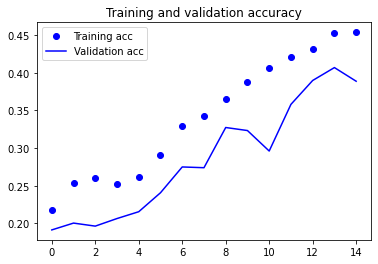

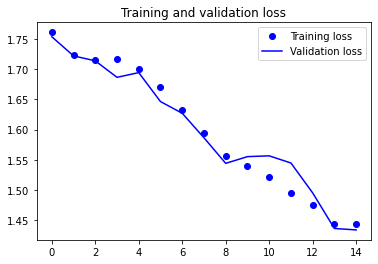

In [5]:
# plot accuracy and loss graphs
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()